# Decision Tree Classification

Problem Statement- Predicting whether a person purchase SUV car or not based on the provided features

# Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

# Loading The Dataset

In [67]:
data=pd.read_csv('Purchased_Dataset.csv')


Pandas DataFrame head() method returns top n rows of a DataFrame or Series where n is a user input value.

In [68]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Checking Missing Values

In [70]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Dimensions Of Dataset

In [71]:
print(data.shape)

(400, 5)


# Statistical Summary

In [72]:
print(data.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


Purchased Distribution

In [73]:
print(data.groupby('Purchased').size())

Purchased
0    257
1    143
dtype: int64


Countplot-Show the counts of observations in each categorical bin using bars.

seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)

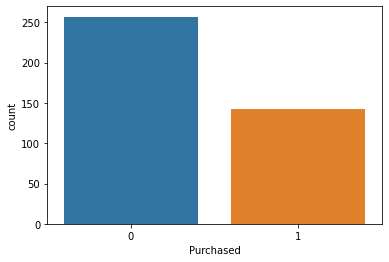

In [74]:
sns.countplot('Purchased',data=data)

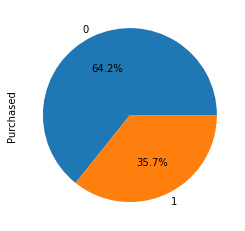

In [75]:
data['Purchased'].value_counts().plot(kind= 'pie',autopct="%.1f%%")

Pairplot- Plot pairwise relationships in a dataset

seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

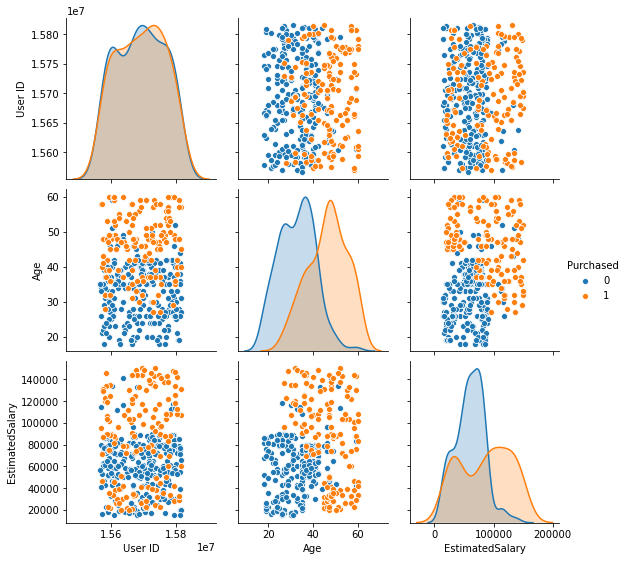

In [76]:
sns.pairplot(data,hue='Purchased')

Extracting Independent and Dependent Variables

In [77]:
x= data.iloc[:, [2,3]].values  
y= data.iloc[:, 4].values  

# Split The Dataset

Split arrays or matrices into random train and test subsets

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None,random_state=None,shuffle=True,stratify=None)

In [78]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

# Feature Scaling

class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

Standardize features by removing the mean and scaling to unit variance

fit_transform(X, y=None, **fit_params) - Fit to data, then transform it.

In [79]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

# Specify The Model

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

In [80]:
# "criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
# random_state=0": For generating the random states.
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  

# Fit The Model

fit-Compute the mean and std to be used for later scaling.

fit(X, y=None, sample_weight=None)

In [81]:
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Pediction Of Test Result 

In [82]:
y_pred= classifier.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

# Accuracy Score

sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

Accuracy classification score

In [83]:
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

91.0

# Confusion Matrix

sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Compute confusion matrix to evaluate the accuracy of a classification

In [84]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

Visualizing Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

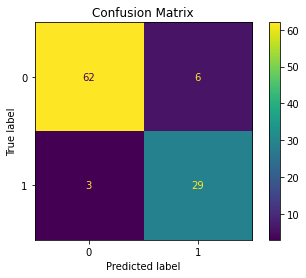

In [85]:
plot_confusion_matrix(classifier,x_test,y_test)
plt.title('Confusion Matrix')

[Text(166.32692307692307, 209.07692307692307, 'X[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(87.99230769230769, 192.35076923076923, 'X[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(38.63076923076923, 175.62461538461537, 'X[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(30.046153846153846, 158.89846153846153, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(47.215384615384615, 158.89846153846153, 'X[1] <= -0.06\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(38.63076923076923, 142.1723076923077, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(55.8, 142.1723076923077, 'X[1] <= 0.403\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(47.215384615384615, 125.44615384615385, 'X[1] <= 0.027\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(38.63076923076923, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(55.8, 108.72, 'X[1] <= 0.259\nentropy = 0.592\nsamples = 28

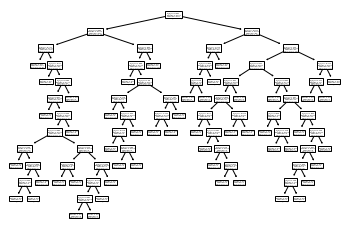

In [86]:
# Visualization Of Tree
tree.plot_tree(classifier)